In [1]:
%reload_ext autoreload
%autoreload 2
import numpy as np
import pynocular as pn

In [2]:
# Generate some test data
p = pn.PointData()
p['x'] = np.linspace(0, 1, 100)
p['y'] = np.random.rand(100)
p['a'] = p['x'] ** 2 * p['y']

In [3]:
p

x,0,0.0101,0.0202,0.0303,0.0404,0.0505,...,0.949,0.96,0.97,0.98,0.99,1
y,0.0996,0.356,0.615,0.161,0.555,0.258,...,0.239,0.296,0.338,0.483,0.514,0.235
a,0,3.63e-05,0.000251,0.000148,0.000906,0.000659,...,0.216,0.273,0.318,0.464,0.504,0.235


In [4]:
p['a']

0,3.63e-05,0.000251,0.000148,0.000906,0.000659,...,0.216,0.273,0.318,0.464,0.504,0.235


In [5]:
np.array(p['a'])

array([0.00000000e+00, 3.63182615e-05, 2.50902682e-04, 1.47834619e-04,
       9.05815670e-04, 6.59341301e-04, 2.32317435e-03, 4.14748542e-03,
       3.15325853e-03, 6.67590090e-03, 5.37451300e-03, 5.87979442e-03,
       1.06057852e-02, 1.51641470e-02, 1.97113036e-02, 6.75650879e-03,
       2.60557539e-02, 1.57371718e-02, 2.61681154e-02, 2.61418763e-03,
       2.38964032e-02, 6.96623892e-03, 4.63034946e-03, 4.29179247e-02,
       3.31031401e-02, 1.51393393e-02, 4.93656476e-02, 5.53476778e-03,
       8.77022531e-03, 5.10697773e-02, 1.36488306e-02, 4.49647509e-02,
       3.20929601e-02, 7.58049195e-02, 4.90131114e-02, 9.82224735e-02,
       1.10203132e-02, 5.15107118e-02, 1.12650736e-01, 1.53153980e-02,
       8.75919243e-02, 1.60914031e-01, 8.55223273e-02, 4.89915471e-04,
       8.43617615e-02, 7.80487719e-02, 1.12710787e-02, 3.68560167e-02,
       8.50666437e-02, 1.31628146e-01, 1.33999500e-01, 2.33133092e-01,
       8.20890691e-02, 7.57479235e-02, 4.93340178e-02, 2.07484537e-01,
      

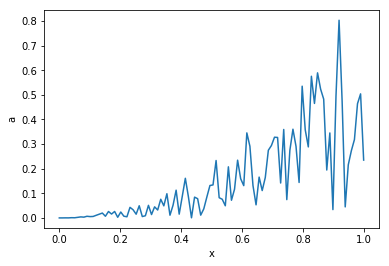

In [6]:
# let's make a simple plot
p.plot('x', 'a')

In [7]:
# different pointdata
p2 = pn.PointData(x=np.random.rand(100))

In [8]:
p2

x,0.118,0.924,0.207,0.0455,0.771,0.0226,...,0.857,0.368,0.402,0.114,0.964,0.944


In [9]:
p2 = p.interp(p2)

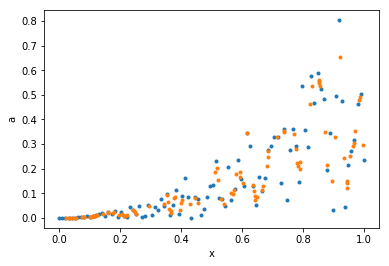

In [10]:
p.plot('x', 'a', '.')
p.interp(p2[['x']], method='linear').plot('x', 'a', '.')

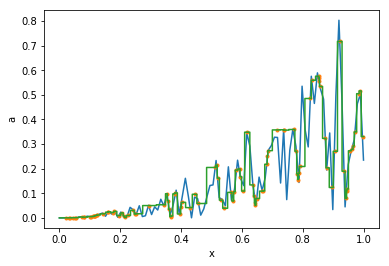

In [11]:
p.plot('x', 'a')
p2.plot('x', 'a', '.')
p2.interp(x=np.linspace(0,1,1000), method='nearest').plot('a')

In [12]:
p.interp(p2)

x,0.118,0.924,0.207,0.0455,0.771,0.0226,...,0.857,0.368,0.402,0.114,0.964,0.944
y,0.646,0.84,0.495,0.428,0.603,0.513,...,0.728,0.0536,0.389,0.532,0.3,0.0874
a,0.00906,0.717,0.0205,0.000756,0.359,0.0002,...,0.534,0.00781,0.0632,0.00692,0.278,0.079


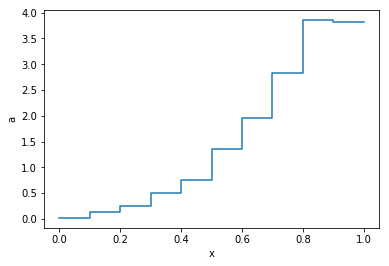

In [13]:
# Generate a histogram function for histograms with weight 'a'
g = p.histogram('x')
g.plot('a')
#g.plot('counts')

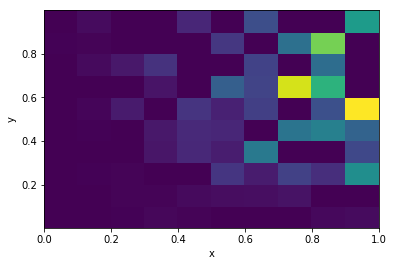

In [14]:
gn = p.histogram('x', 'y')
gn.plot('a')

In [15]:
gn['a']

y \ x,[0. 0.1],[0.1 0.2],[0.2 0.3],[0.3 0.4],[0.4 0.5],[0.5 0.6],[0.6 0.7],[0.7 0.8],[0.8 0.9],[0.9 1. ]
[0.003 0.102],0,0.00261,0.0102,0.0263,0.0118,0,0,0,0.0337,0.0448
[0.102 0.202],0.000148,0,0.0157,0.0136,0.0369,0.0493,0.0531,0.0743,0,0
[0.202 0.301],0.000659,0.00676,0.0151,0,0,0.23,0.111,0.286,0.194,0.723
[0.301 0.401],3.63e-05,0,0,0.0836,0.163,0.117,0.592,0,0,0.318
[0.401 0.5 ],0.00315,0.00588,0,0.094,0.17,0.159,0,0.565,0.633,0.464
[0.5 0.6],0.000906,0.0211,0.108,0,0.219,0.134,0.275,0,0.358,1.47
[0.6 0.699],0.00257,0,0,0.0758,0,0.442,0.294,1.37,0.947,0
[0.699 0.799],0,0.0368,0.0923,0.211,0,0,0.291,0,0.523,0
[0.799 0.898],0.0108,0.0152,0,0,0,0.233,0,0.535,1.16,0
[0.898 0.998],0,0.0458,0,0,0.161,0,0.345,0,0,0.803


In [16]:
np.sum(gn['a'], axis='y')

x,[0. 0.1],[0.1 0.2],[0.2 0.3],[0.3 0.4],[0.4 0.5],[0.5 0.6],[0.6 0.7],[0.7 0.8],[0.8 0.9],[0.9 1. ]
,0.0183,0.134,0.241,0.504,0.762,1.36,1.96,2.83,3.85,3.82


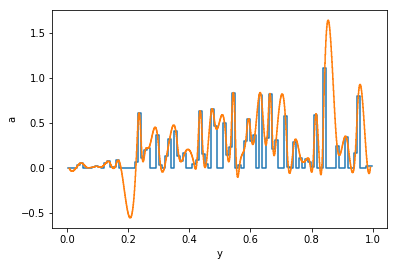

In [17]:
p.histogram(y=100).plot('a')
p.binwise(y=100, function=np.sum, fill_value=np.nan).interp(y=1000, method='cubic').plot('a')

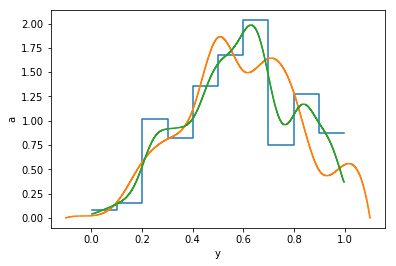

In [18]:
p.histogram('y', density=True).plot('a')
p.histogram(y=np.linspace(-0.1,1.1,13), density=True).interp(y=1000).plot('a')
p.kde(y=1000, density=True, bw=0.05).plot('a')

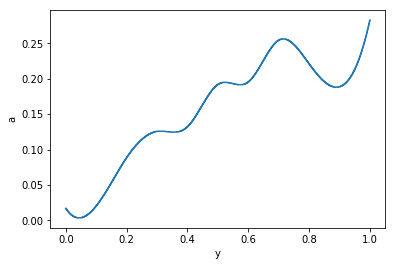

In [19]:
p.binwise(y=np.linspace(-0.1,1.1,13), function=np.mean).interp(y=1000, method='cubic').plot('a')

In [20]:
g = p.histogram(x=10)

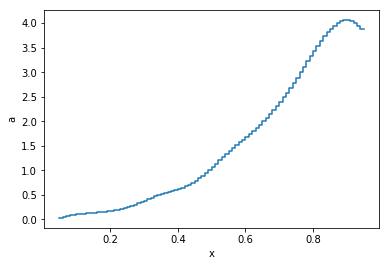

In [21]:
g.interp(x=100).plot('a')

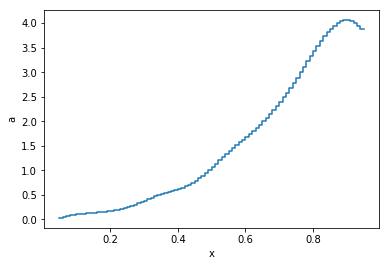

In [22]:
g.interp(x=100).plot('a')

In [23]:
p.histogram(x=10).grid

Grid(
Axis("x",
points = None,
edges = edges: array([[0. , 0.1],
       [0.1, 0.2],
       [0.2, 0.3],
       [0.3, 0.4],
       [0.4, 0.5],
       [0.5, 0.6],
       [0.6, 0.7],
       [0.7, 0.8],
       [0.8, 0.9],
       [0.9, 1. ]]))
nbins = 10),)

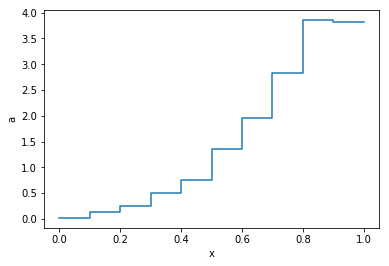

In [24]:
# or in one line
p.histogram('x').plot('a')

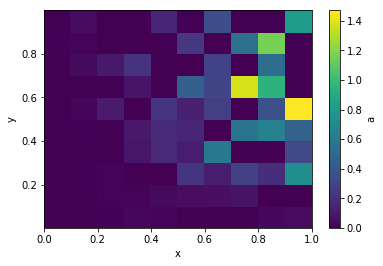

In [25]:
# we can also evaluate the histogram in different dimensions
p.histogram('x', 'y').plot('a', cbar=True)

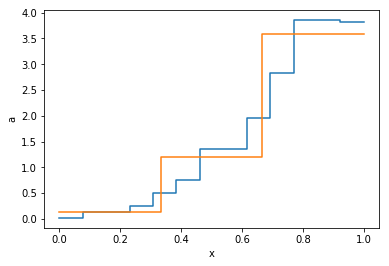

In [26]:


# we can also evaluate the histogram in different dimensions
g = p.histogram('x')
p.histogram('x').resample(x=13).plot('a')
p.histogram('x').resample(x=3).plot('a')


In [27]:
g['a']

x,[0. 0.1],[0.1 0.2],[0.2 0.3],[0.3 0.4],[0.4 0.5],[0.5 0.6],[0.6 0.7],[0.7 0.8],[0.8 0.9],[0.9 1. ]
,0.0183,0.134,0.241,0.504,0.762,1.36,1.96,2.83,3.85,3.82


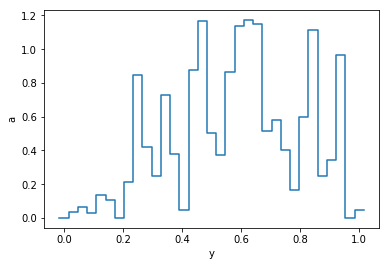

In [28]:
p.histogram(y=np.linspace(0,1,33)).plot('a')

In [29]:
# the returned object is a GridData type
g = p.histogram(x=20)

In [30]:
# it has a grid defined
g

x,[0. 0.05],[0.05 0.1 ],[0.1 0.15],[0.15 0.2 ],[0.2 0.25],[0.25 0.3 ],...,[0.7 0.75],[0.75 0.8 ],[0.8 0.85],[0.85 0.9 ],[0.9 0.95],[0.95 1. ]
y,1.79,3.01,3.59,2.69,2.19,1.73,...,2.35,2.64,3.3,2.08,2.39,1.87
a,0.00134,0.017,0.0567,0.0773,0.112,0.13,...,1.23,1.6,2.28,1.58,2.03,1.79


In [31]:
1//2

0